### Sales data 

Run the cell below to load the required packages and set up plotting in the notebook!

In [102]:
import numpy as np
import scipy.stats as stats
import csv
import seaborn as sns
%matplotlib inline

#### 1. Loading the data

The csv has about 200 rows of data and 4 columns.

Using the pattern for loading csvs we learned earlier, add all of the rows in the csv file to the rows list.

For your reference, the pattern is:
```python
with open(my_csv_path, 'r') as f:
    data = f.read()
    ...
```


In [103]:
### add the correct path 
with open('../data/sales_data.csv', 'r') as f:
    data = f.read()

Let's split on the newline character `\n`

In [104]:
## your code
data = data.split('\n')

##### 2. Separate header and data

The header of the csv is contained in the first index of the ```rows``` variable, as it is the first row in the csv file. 

Use python indexing to create two new variables: ```header``` which contains the 4 column names, and ```data``` which contains the row level data as a string.

Lastly, print ```header``` to see the names of the columns.



In [105]:
## dividing into header and body 
header = data[0]
body = data[1:]

In [106]:
# last row 

data[-1]

'50.2758932156,225.055138499,407738.79,32079.13'

In [107]:
### splitting on comma 
new_body = []

for row in body:
    new_body.append(row.split(','))

In [108]:
## taking a look at the first 5 rows of new body
new_body[:5]

[['18.4207604861', '93.8022814583', '337166.53', '337804.05'],
 ['4.77650991918', '21.0824246877', '22351.86', '21736.63'],
 ['16.6024006077', '93.6124943024', '277764.46', '306942.27'],
 ['4.29611149826', '16.8247038328', '16805.11', '9307.75'],
 ['8.15602328201', '35.0114570034', '54411.42', '58939.9']]

In [109]:
## new list of lists 
new_body_float = []

for row in new_body:
    ## creating 
    new_row = []
    for cell in row:
        new_row.append(float(cell))
    new_body_float.append(new_row)

In [110]:
## splitting header column 

header_list = header.split(',')

In [111]:
## just looking at how enumerate works 
for n,v in enumerate(header_list):
    print(n,v)

0 volume_sold
1 2015_margin
2 2015_q1_sales
3 2016_q1_sales


In [112]:
## the first 4 rows of new body float 

new_body_float[:4]

[[18.4207604861, 93.8022814583, 337166.53, 337804.05],
 [4.77650991918, 21.0824246877, 22351.86, 21736.63],
 [16.6024006077, 93.6124943024, 277764.46, 306942.27],
 [4.29611149826, 16.8247038328, 16805.11, 9307.75]]

In [113]:
## creating a dictionary with the column names as the keys and the values are a list of the appropriate values

new_dict = {'volume_sold':[], '2015_margin':[], '2015_q1_sales':[],\
           '2016_q1_sales':[]}

## option instead of typing them out 
new_dict_2 = {}
for i in header_list:
    new_dict_2[i] = []

## for every row in the data set
for row in new_body_float:
    ## for number, value in header_list
    for n,v in enumerate(header_list):
        ## grab the appropriate value from the row 
        cell = row[n]
        ## append that value to the appropriate key in the dictionary 
        new_dict[v].append(cell)


#### 3. Create a function that takes in a column (in string form) and converts it into a list of floats


In [114]:
## alternate method to create the dictionary in two steps folows - note we are working with the base data again

##testing to see if my function works on one column of strings

## looking at what I'm working with 
body[0]

'18.4207604861,93.8022814583,337166.53,337804.05'

In [115]:
float_cells = []
for cell in body[0].split(','):
    float_cells.append(float(cell))
float_cells

[18.4207604861, 93.8022814583, 337166.53, 337804.05]

In [116]:
## make it a function

def row_converter(row):
    f_cells = []
    for cell in row.split(','):
        f_cells.append(float(cell))
    return f_cells

### testing 
row_converter(body[0])

[18.4207604861, 93.8022814583, 337166.53, 337804.05]

In [117]:
## as a list comprehension
def row_converter2(row):
    return [float(cell) for cell in row.split(',')]

### testing
row_converter2(body[0])

[18.4207604861, 93.8022814583, 337166.53, 337804.05]

In [118]:
## use the function to convert everything to floats 

converted_body = []
for row in body:
    converted_row = row_converter(row)
    converted_body.append(converted_row)

In [119]:
## first five rows of converted body 
converted_body[:5]

[[18.4207604861, 93.8022814583, 337166.53, 337804.05],
 [4.77650991918, 21.0824246877, 22351.86, 21736.63],
 [16.6024006077, 93.6124943024, 277764.46, 306942.27],
 [4.29611149826, 16.8247038328, 16805.11, 9307.75],
 [8.15602328201, 35.0114570034, 54411.42, 58939.9]]

#### 4. Create a dictionary

Use loops or list comprehensions to create a dictionary called ```sales_data```, where the keys of the dictionary are the column names, and the values of the dictionary are lists of the data points of the column corresponding to that column name.

In [120]:
sales_data_dict = {}

## loop through our four columns 
for number, value in enumerate(header_list):
    long_row = [] ## note we are creating this 4 times  
    
    ## loop down all the rows 
    for row in converted_body:
        ## append the value with the corresponding column (using the number from enumerate)
        long_row.append(row[number])
    
    ## assign the big row to the correct key 
    sales_data_dict[value] = long_row
    

**4.A** Print out the first 10 items of the 'volume_sold' column.

In [121]:
sales_data_dict['volume_sold'][:10]

[18.4207604861,
 4.77650991918,
 16.6024006077,
 4.29611149826,
 8.15602328201,
 5.00512242518,
 14.60675,
 4.45646649485,
 5.04752965097,
 5.38807023767]

#### 5. Write function to print summary statistics

Now write a function to print out summary statistics for the data.

Your function should:

- Accept the column as an argument
- Print out information, clearly labeling each item when you print it:
    1. Print out the column name
    2. Print the mean of the data using ```np.mean()```
    3. Print out the median of the data using ```np.median()```
    4. Print out the variance of the data using ```np.var()```
    5. Print out the standard deviation of the data using ```np.std()```

In [122]:
def summary_statistics(column):
    print(column)
    print('*' * 50) ## this is for formatting
    print(f"Mean: {np.mean(sales_data_dict[column])}")
    print(f"Mean: {np.median(sales_data_dict[column])}")
    print(f"Mean: {np.var(sales_data_dict[column])}")
    print(f"Mean: {np.std(sales_data_dict[column])}")

**5.A** Using your function, print the summary statistics for 'volume_sold'

In [123]:
summary_statistics('volume_sold')

volume_sold
**************************************************
Mean: 10.0186840789888
Mean: 8.16634551564
Mean: 84.12996520049938
Mean: 9.172238832504275


**5.B** Using your function, print the summary statistics for '2015_margin'

In [124]:
summary_statistics('2015_margin')

2015_margin
**************************************************
Mean: 46.8588951379235
Mean: 36.5621438181
Mean: 2016.0616629583997
Mean: 44.90057530765502


**5.C** Using your function, print the summary statistics for '2015_q1_sales'

In [125]:
summary_statistics('2015_q1_sales')

2015_q1_sales
**************************************************
Mean: 154631.66820000001
Mean: 104199.41
Mean: 47430301462.331505
Mean: 217784.98906566427


**5.D** Using your function, print the summary statistics for '2016_q1_sales'

In [126]:
summary_statistics('2016_q1_sales')

2016_q1_sales
**************************************************
Mean: 154699.17875
Mean: 103207.20000000001
Mean: 47139411653.44524
Mean: 217116.12481215032


#### 6. Plot the distributions

We've provided a plotting function below called ```distribution_plotter()```. It again takes the column name as an argument. 

In individual cells, plot the distributions for each of the 4 columns. Do the data appear skewed? Symmetrical? If skewed, what would be your hypothesis for why?

In [127]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def distplotter(column, bins = 20, kde=True, color='blue'):
    fig , ax = plt.subplots()
    sns.distplot(sales_data_dict[column], bins=bins, kde=kde, ax=ax,axlabel=column, color=color);


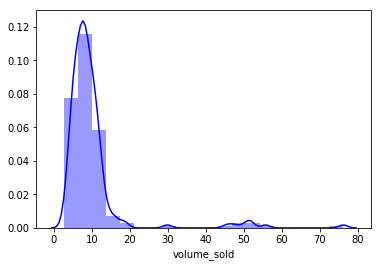

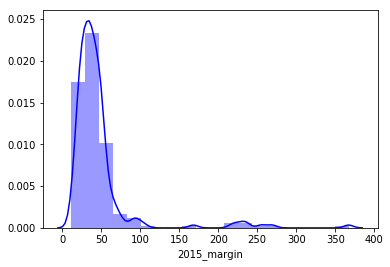

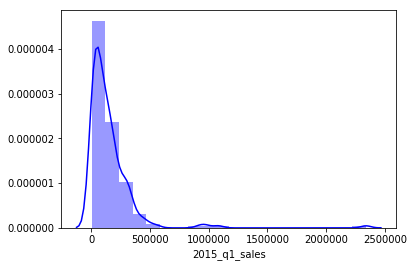

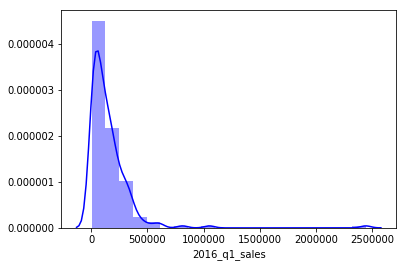

In [128]:
for col in sales_data_dict.keys():
    distplotter(col)